# Considering the Cooler Condition as Target Variable:

##### This notebook considers cooler condition as target variable and uses feature selection methods to select top features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis,skew,iqr   
import plotly.express as px

sns.set_style("darkgrid")

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('../data/processed_data/final_df.csv')

In [3]:
df_target=pd.read_csv('../data/processed_data/target_df.csv')

In [4]:
# Adding Cooler condition labels to the dataframe from profile data frame
df_cooler= pd.concat([df,df_target['Cooler condition / %']],axis=1)

In [5]:
df_cooler.head()

,PS1_mean,PS1_median,PS1_min,PS1_max,PS1_std,PS1_kurtosis,PS1_skewness,PS1_iqr,PS2_mean,PS2_median,...,CP_iqr,SE_mean,SE_median,SE_min,SE_max,SE_std,SE_kurtosis,SE_skewness,SE_iqr,Cooler condition / %
0,160.673492,156.25,145.83,191.51,13.939309,0.495566,1.273048,15.12,109.466914,129.365,...,0.52700,59.157183,68.5145,0.0,79.568,23.763984,2.339639,-2.030801,1.232,3
1,160.603320,156.06,145.73,191.47,14.118967,0.460174,1.278690,15.13,109.354890,129.385,...,0.12150,59.335617,68.5360,0.0,80.441,23.857918,2.322487,-2.022689,1.496,3
2,160.347720,155.72,145.37,191.41,14.192619,0.464134,1.282851,15.28,109.158845,129.325,...,0.03275,59.543150,68.8530,0.0,80.824,23.923381,2.338352,-2.027789,1.556,3
3,160.188088,155.56,145.14,191.34,14.227803,0.470640,1.286353,15.31,109.064807,128.865,...,0.03150,59.794900,69.0060,0.0,80.930,24.023005,2.338694,-2.028969,1.283,3
4,160.000472,155.34,144.95,191.41,14.276434,0.481844,1.292315,15.30,108.931434,129.000,...,0.03050,59.455267,69.0130,0.0,81.100,23.972262,2.268655,-2.000267,1.477,3


In [6]:
# Converting Cooler Condition to categorical variable
df_cooler['Cooler condition / %']=df_cooler['Cooler condition / %'].astype('category')

In [7]:
df_cooler['Cooler condition / %']=df_cooler['Cooler condition / %'].map({3:'close to total failure',20:'reduced effifiency',
                                                                         100:'full efficiency'})

### Considering  ANOVA feature selection method as Input is Numerical and Output is Categorical

In [8]:
def feature_scaling(df,target):
    '''Preprocessing and Feature Scaling
    Parameters:
    df: Dataframe with features and defect that needs to be scaled
    Output:Returns two data frames X(features) and y(labels)'''
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import numpy as np
    
    # preprocessing using standard scaler
    scaler=StandardScaler()
    
    # Dividing data into features(X) and labels(y)
    X=df.drop(target,axis=1)
    y=df[target]
    
    #Scaling features by using StandardScaler
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y

In [9]:
X,y = feature_scaling(df_cooler,'Cooler condition / %')

#### ANOVA Feature Selection

In [10]:
from sklearn.feature_selection import f_classif,SelectKBest,mutual_info_classif

In [11]:
select_model=SelectKBest(f_classif,k='all')

In [12]:
select_model.fit(X,y)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  18 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [13]:
feature_score=pd.DataFrame({'Feature':X.columns,'Importance':select_model.scores_}).sort_values(by='Importance',ascending=False)

In [14]:
feature_score.describe()

,Importance
count,133.000000
mean,12969.476649
std,41519.807640
min,0.019823
25%,198.362847
50%,623.961912
75%,13383.155274
max,278213.175210


In [15]:
treshold=feature_score['Importance'].mean()
feature_score_top=feature_score[feature_score['Importance']>treshold]

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


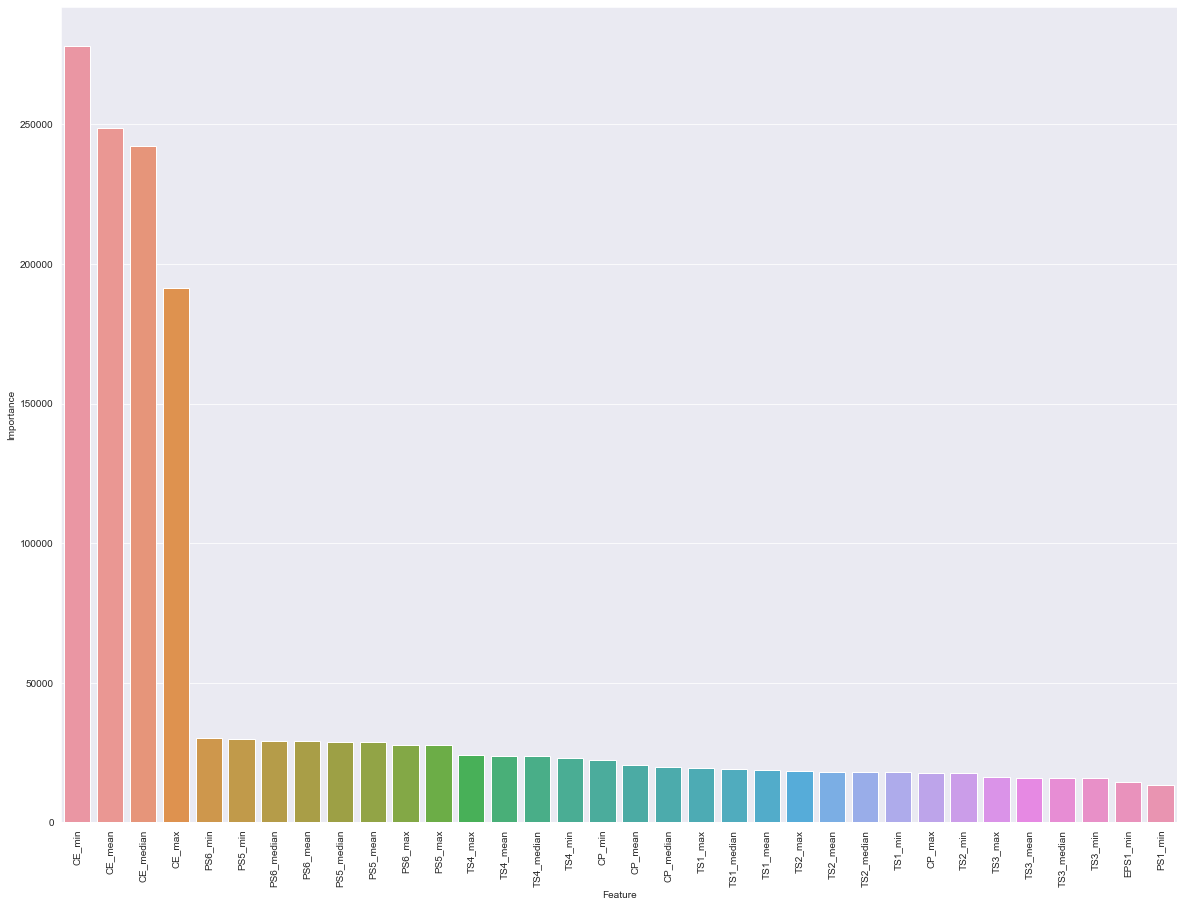

In [16]:
plt.figure(figsize=(20,15))
sns.barplot(feature_score_top['Feature'],feature_score_top['Importance'])
plt.xticks(rotation=90);

In [17]:
df_cooler_anova = df_cooler[feature_score_top.Feature]
df_cooler_anova['Cooler condition / %']=df_cooler['Cooler condition / %']

<ipython-input-17-08da22a40bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cooler_anova['Cooler condition / %']=df_cooler['Cooler condition / %']


In [18]:
df_cooler_anova

,CE_min,CE_mean,CE_median,CE_max,PS6_min,PS5_min,PS6_median,PS6_mean,PS5_median,PS5_mean,...,TS1_min,CP_max,TS2_min,TS3_max,TS3_mean,TS3_median,TS3_min,EPS1_min,PS1_min,Cooler condition / %
0,28.866,39.601350,40.6755,47.438,9.568,9.681,9.733,9.728097,9.844,9.842170,...,35.156,2.188,40.773,38.613,38.471017,38.4960,38.316,2339.8,145.83,close to total failure
1,23.320,25.786433,25.3855,29.208,9.454,9.557,9.526,9.529488,9.632,9.635142,...,35.648,1.414,41.031,39.254,38.978967,38.9845,38.668,2332.0,145.73,close to total failure
2,21.220,22.218233,22.1040,23.554,9.348,9.455,9.425,9.427949,9.528,9.530548,...,36.879,1.159,41.832,40.062,39.631950,39.6270,39.234,2318.6,145.37,close to total failure
3,19.673,20.459817,20.4805,21.565,9.257,9.363,9.335,9.337430,9.436,9.438827,...,37.887,1.107,42.805,40.934,40.403383,40.3420,40.023,2310.8,145.14,close to total failure
4,19.133,19.787017,19.7985,20.460,9.195,9.290,9.260,9.260636,9.358,9.358762,...,38.789,1.106,43.742,41.777,41.310550,41.3400,40.859,2301.8,144.95,close to total failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.242,46.628517,46.6335,47.092,9.790,9.910,9.849,9.850361,9.970,9.972037,...,35.000,2.196,40.727,38.371,38.269267,38.2620,38.168,2346.0,146.69,full efficiency
2201,45.762,46.689817,46.6510,47.486,9.777,9.901,9.844,9.844854,9.965,9.966184,...,34.988,2.200,40.707,38.418,38.268250,38.2620,38.148,2345.8,146.64,full efficiency
2202,45.683,46.472300,46.7005,47.206,9.777,9.898,9.842,9.842628,9.964,9.964329,...,34.984,2.188,40.719,38.371,38.246367,38.2420,38.156,2345.8,146.63,full efficiency
2203,45.846,46.544967,46.5490,47.001,9.767,9.898,9.846,9.846690,9.967,9.968232,...,35.000,2.188,40.742,38.363,38.245733,38.2460,38.145,2346.0,146.65,full efficiency


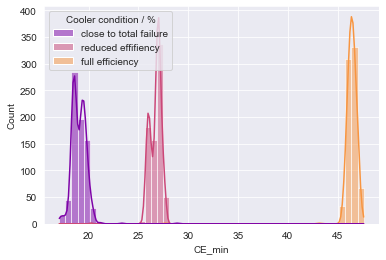

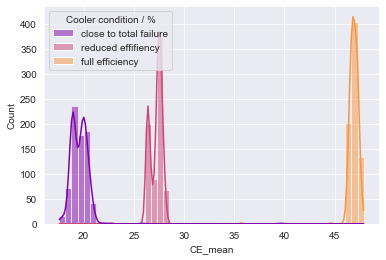

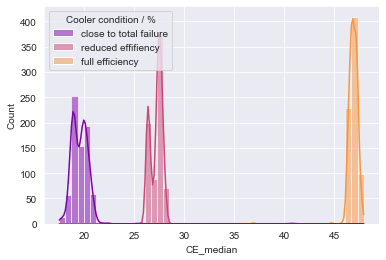

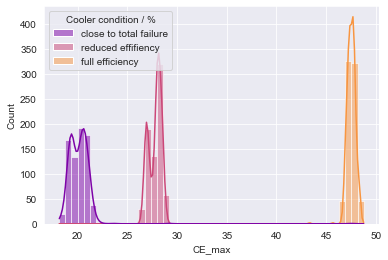

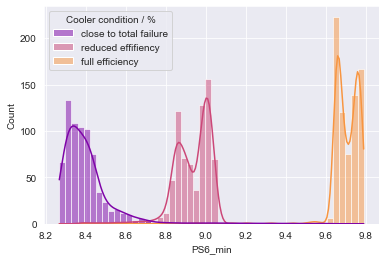

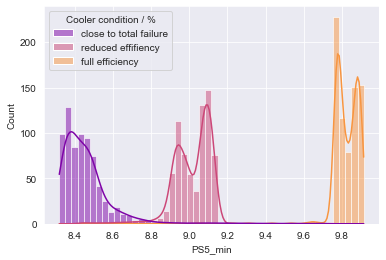

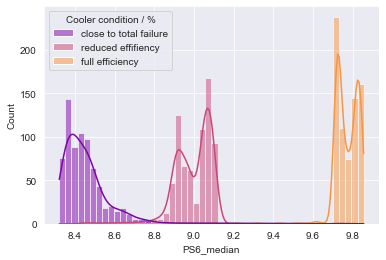

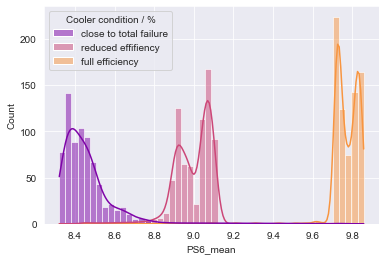

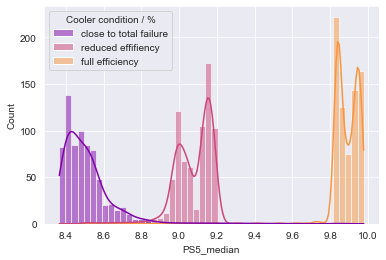

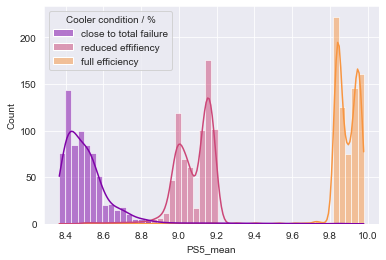

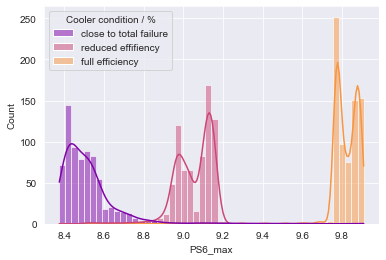

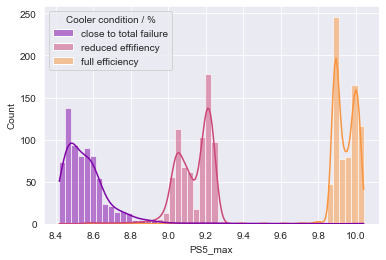

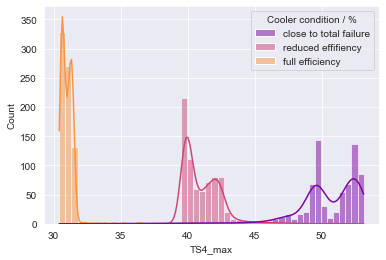

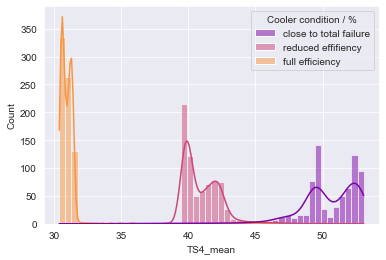

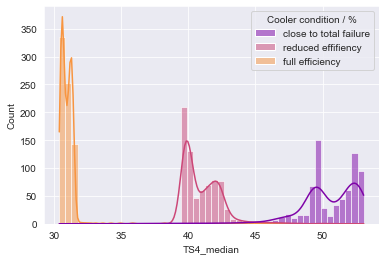

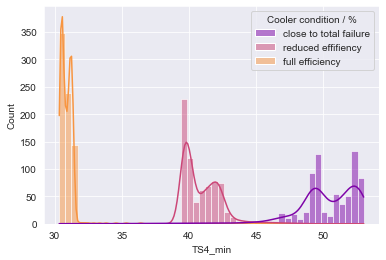

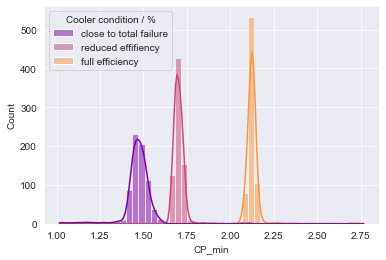

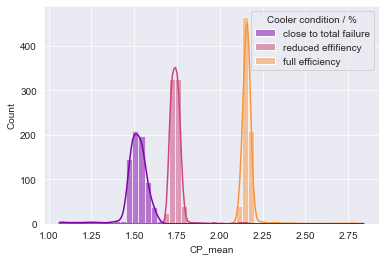

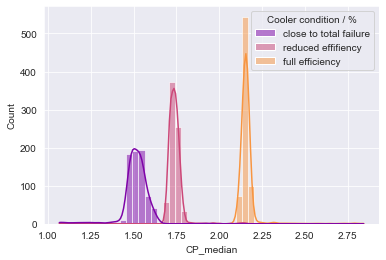

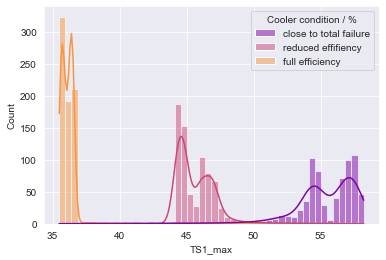

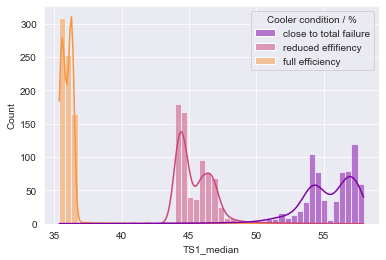

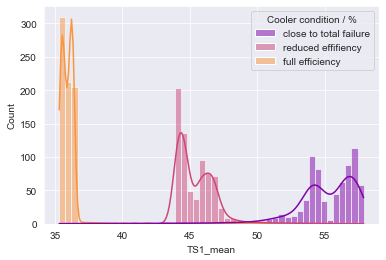

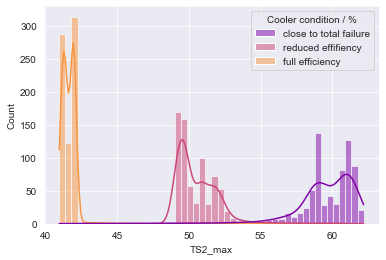

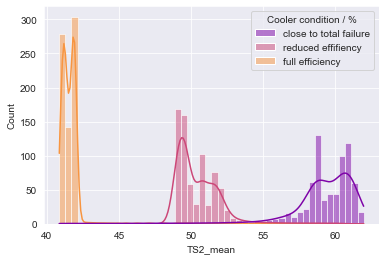

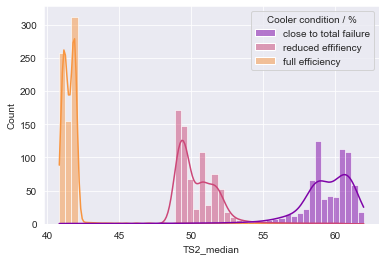

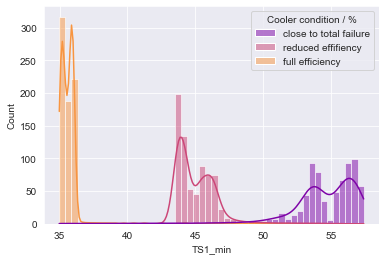

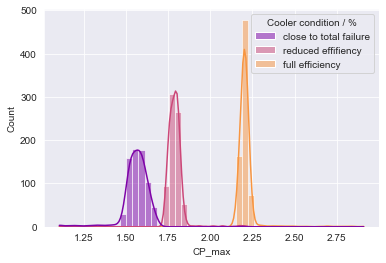

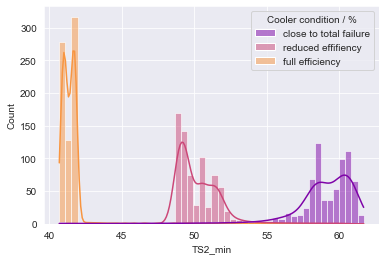

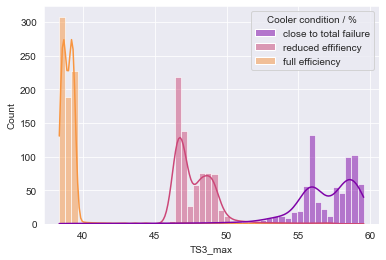

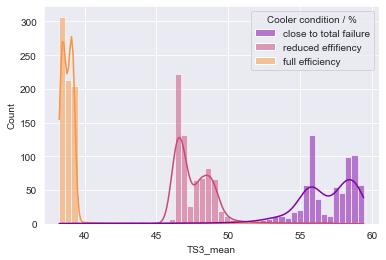

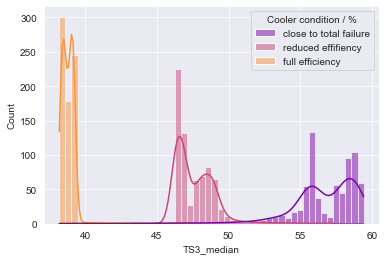

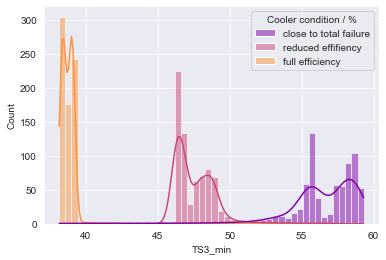

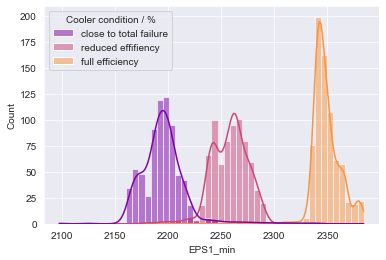

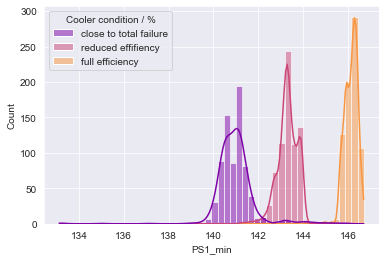

In [19]:
# Plotting Distributions of each feature 

for i in df_cooler_anova.drop('Cooler condition / %',axis=1).columns:
    sns.histplot(data=df_cooler_anova,x=i,hue='Cooler condition / %',kde=True,bins=50,palette='plasma')
    plt.show()

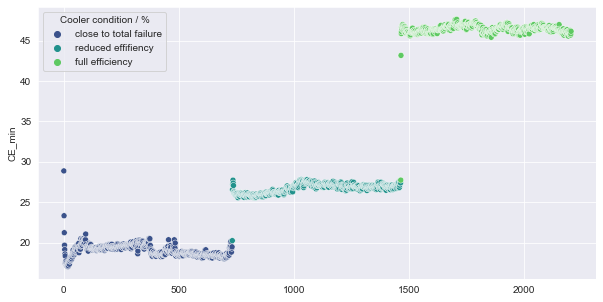

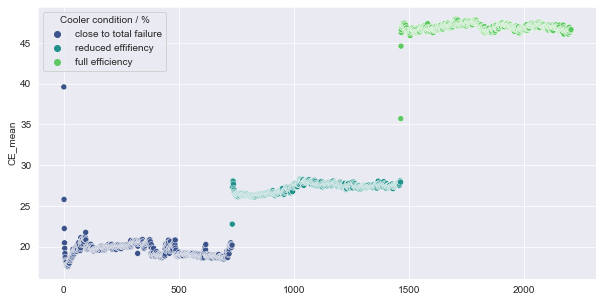

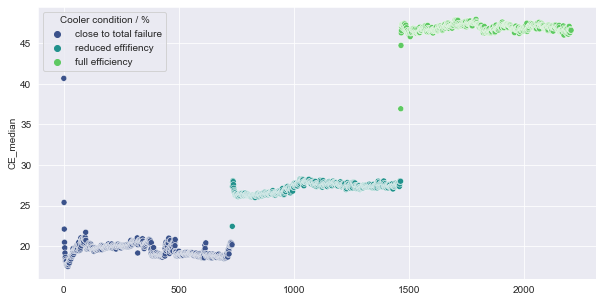

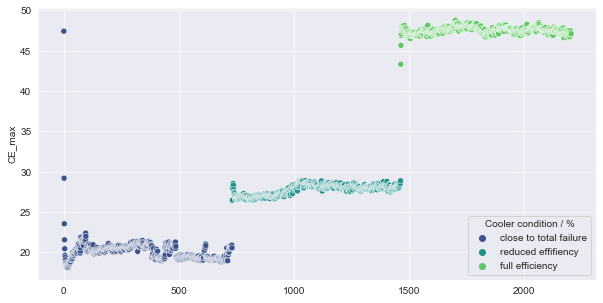

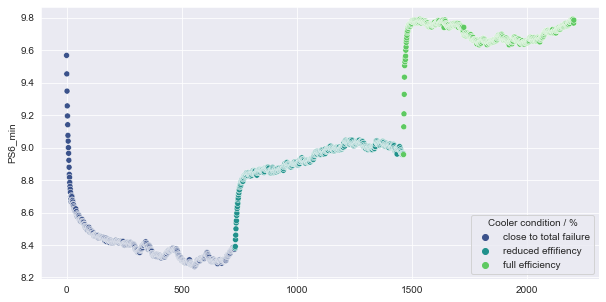

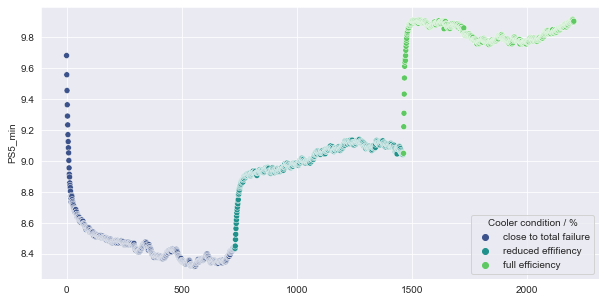

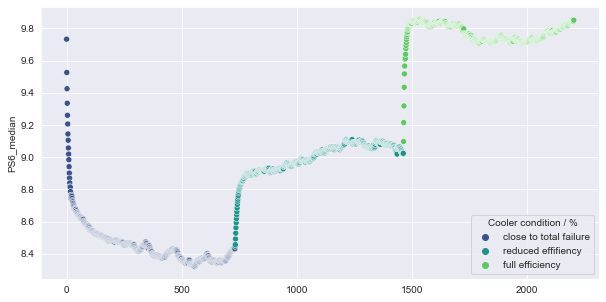

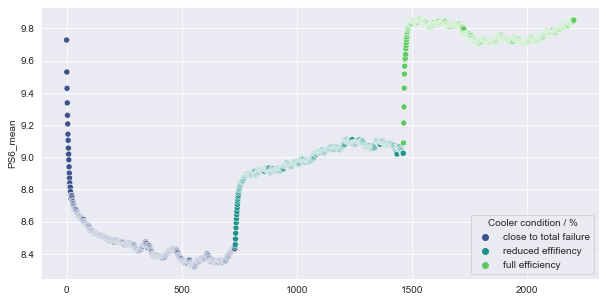

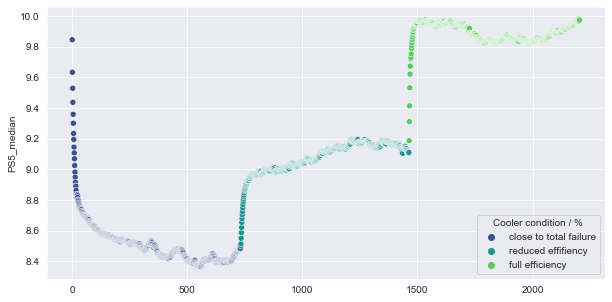

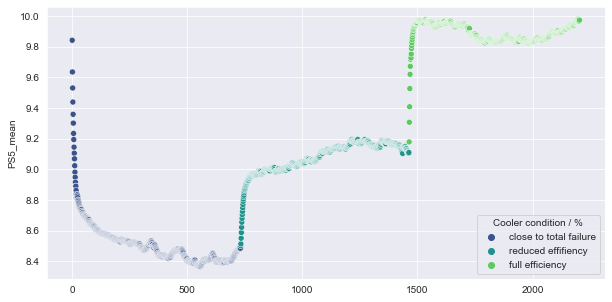

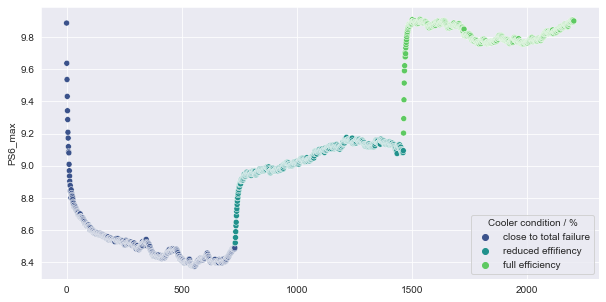

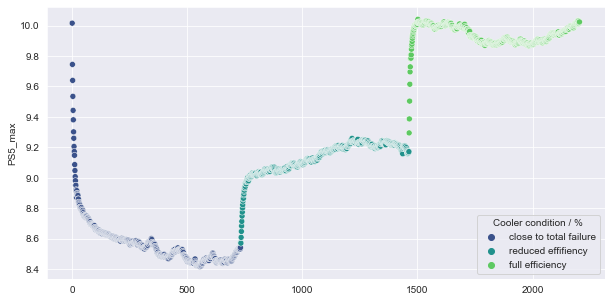

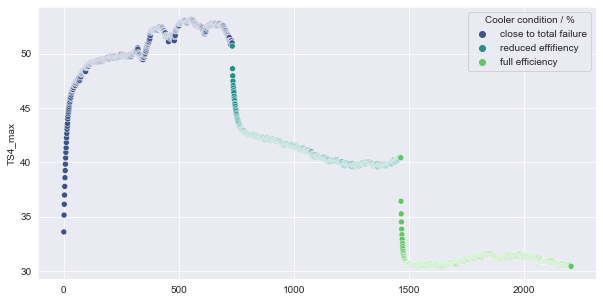

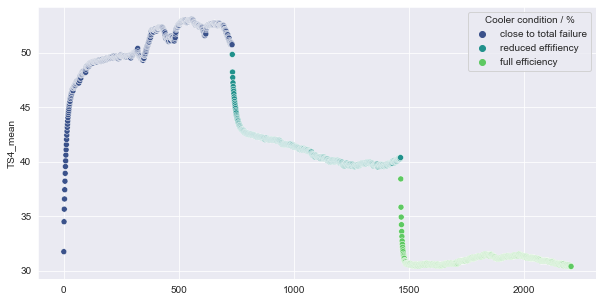

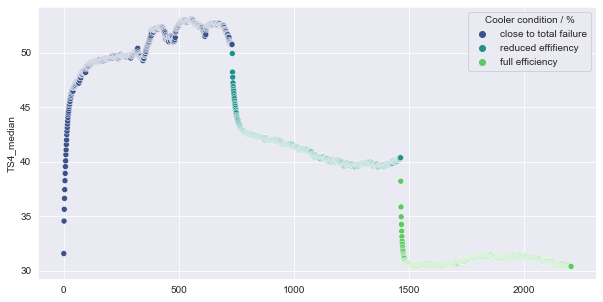

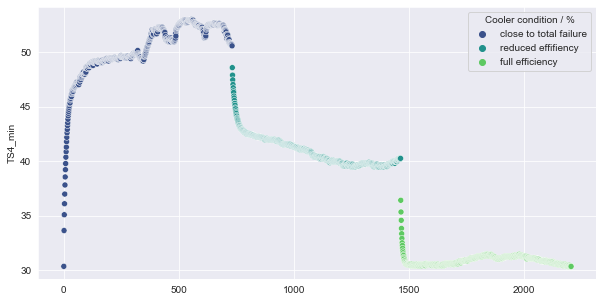

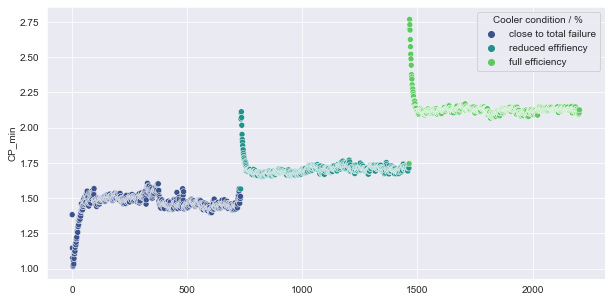

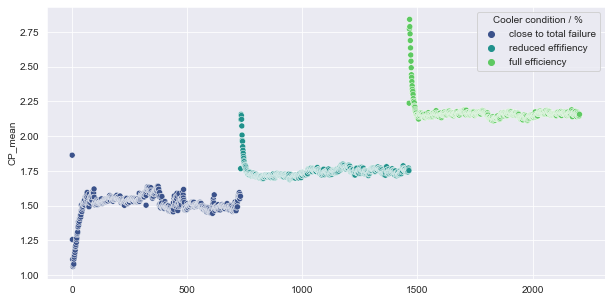

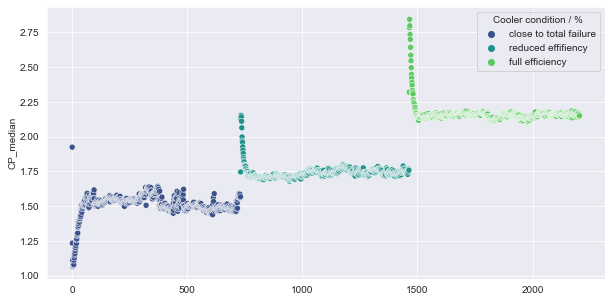

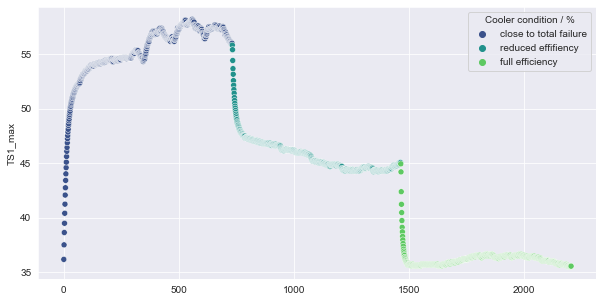

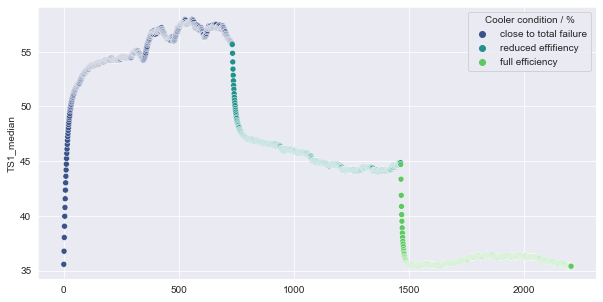

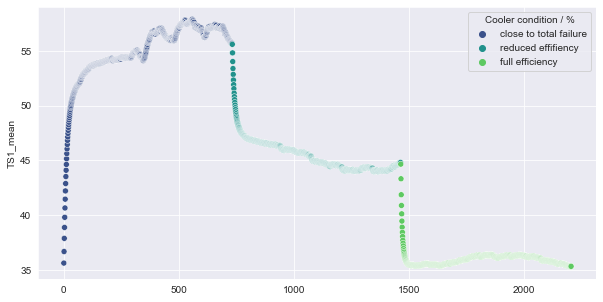

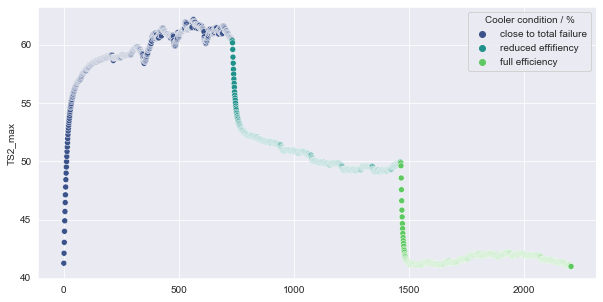

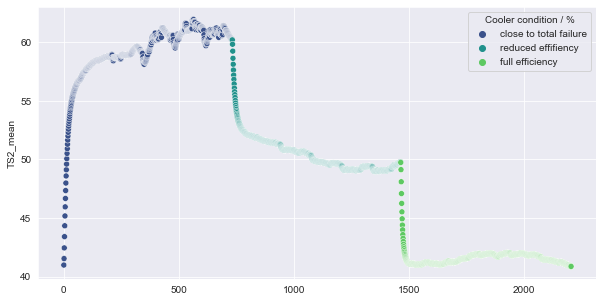

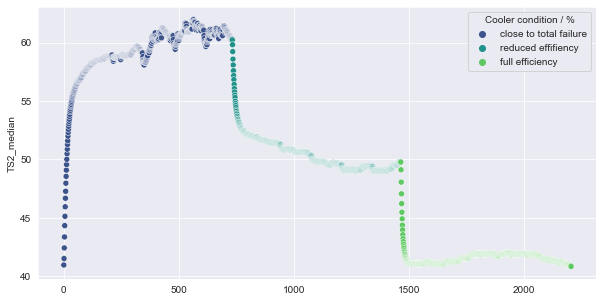

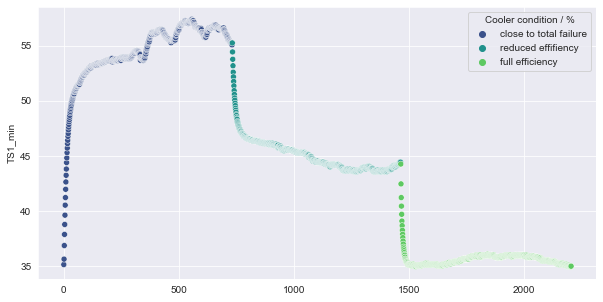

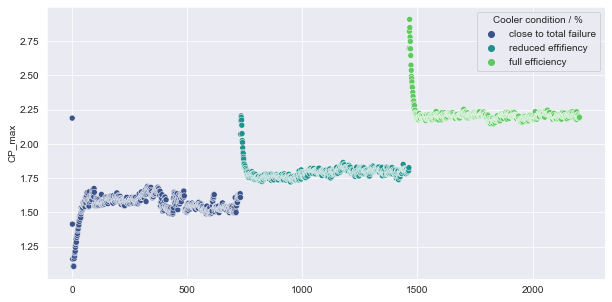

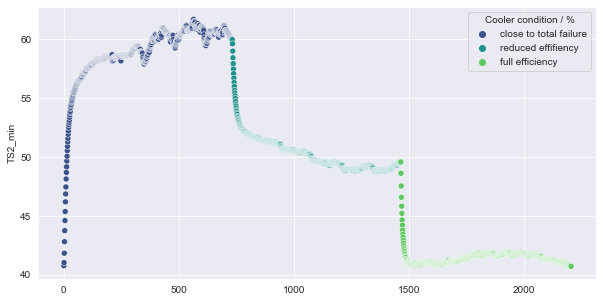

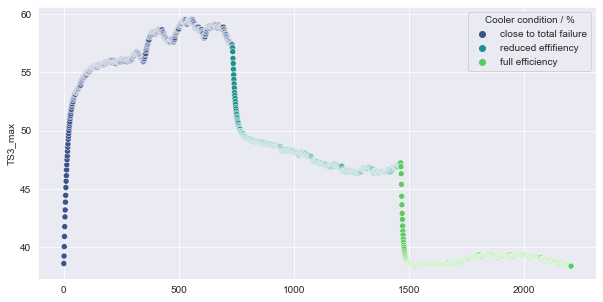

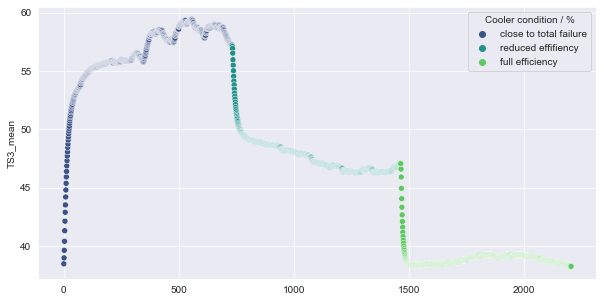

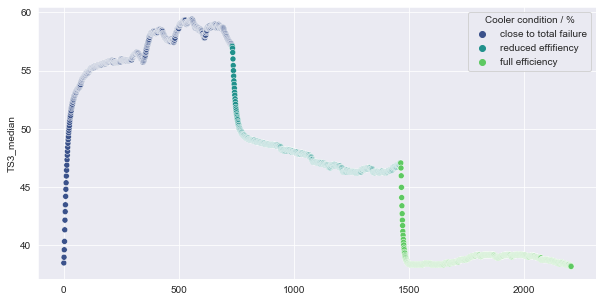

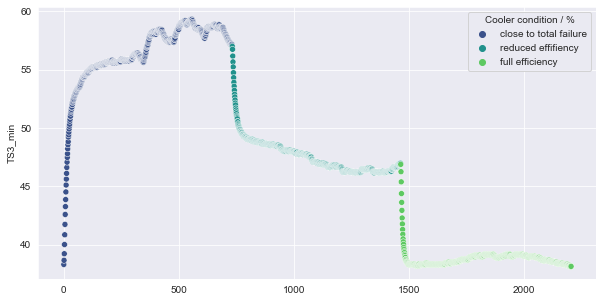

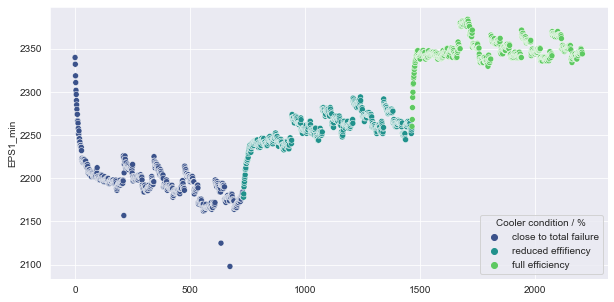

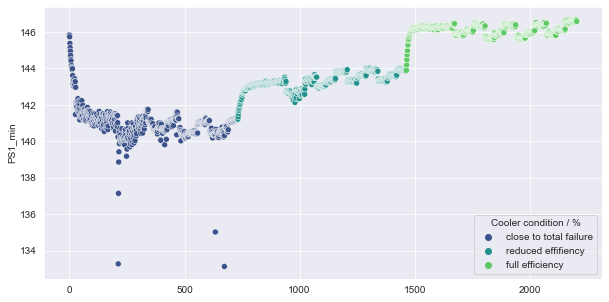

In [20]:

for i in df_cooler_anova.drop('Cooler condition / %',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_cooler_anova,y=i,x=df_cooler_anova.index,hue='Cooler condition / %',palette='viridis')
    plt.show()

## Conclusion

##### 1) From the above visualizations it can be considered that the feature distributions are very well seperated and the cooler condition can be easily identified by defining boundary limits.

##### 2) Features based on cooling efficiency have been selected, It can be justified as the cooler performs better when it's efficiency is as at optimum level,  and any deterioration in the condition also reduces the efficiency

##### 3) Features based on pressure sensors have been selected, It indicates the pump must supply the coolant at certain pressures to maintain the temperature levels

##### 4) Features based on temperature sensors have been selected, The main  purpose of cooler is to maintian temperature , hence , if there is a increase in temperature, there are high chances that the condition of cooler is degrading as the required temperatures are not maintained.

##### Hence, it can be concluded that the features obtained from ANOVA are relevant physically. It is observed that the distributions of features selected are very well separated, Therefore, boundary limits can be set to classify the cooler condition based on distribution plots